<a href="https://colab.research.google.com/github/Mokshitha08/AIML-2303A52122/blob/main/AIML_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install scikit-learn

from sklearn.tree import export_text
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree, DecisionTreeClassifier

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
file_path = '/content/weather_forecast_data.csv'
weather_data = pd.read_csv(file_path)

In [50]:
weather_data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Humidity_Normalized
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,0.895926
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,0.464897
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,0.830728
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain,0.743678
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,0.968588


In [51]:
weather_data['Humidity_Normalized'] = weather_data['Humidity'] / 100

In [52]:
weather_data.drop('Humidity', axis=1, inplace=True)

In [53]:
weather_data['Rain'] = weather_data['Rain'].map({'no rain': 0, 'rain': 1})

In [54]:
X = weather_data.drop(columns=['Rain'])
y = weather_data['Rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

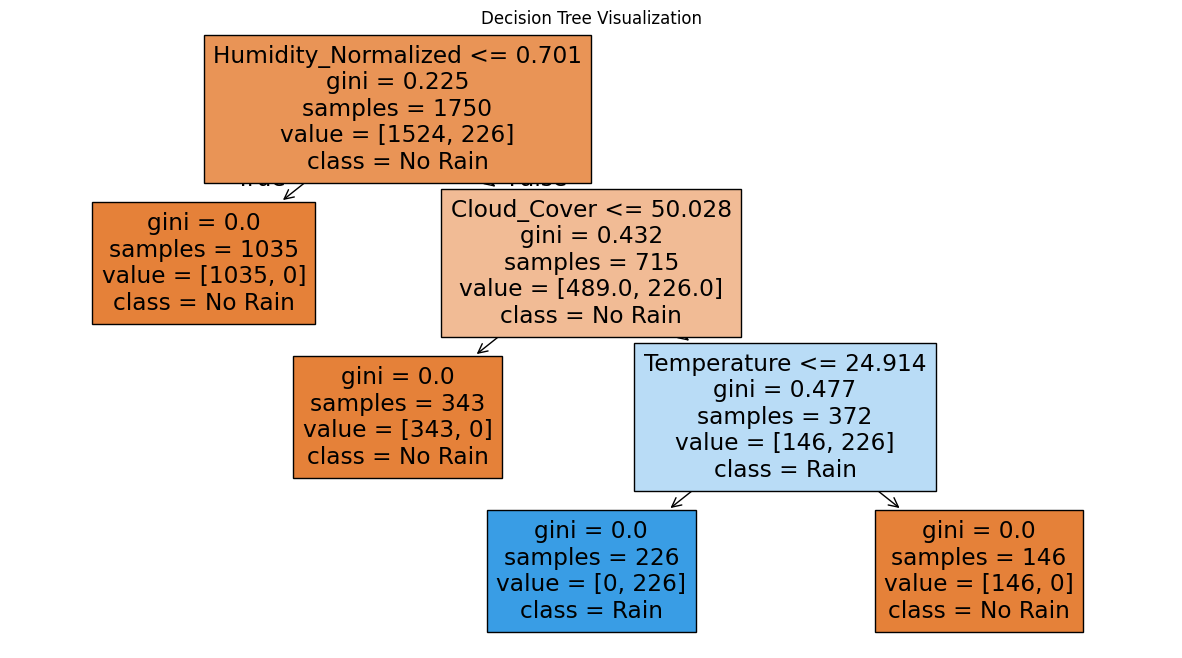

In [56]:
plt.figure(figsize=(15, 8))
plot_tree(tree_clf, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


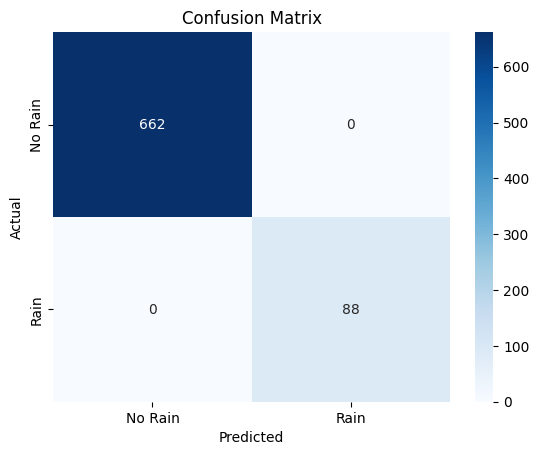

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
pruned_tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_tree_clf.fit(X_train, y_train)

y_pruned_pred = pruned_tree_clf.predict(X_test)

In [59]:
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print(f"Pruned Tree Accuracy: {pruned_accuracy:.2f}")

print(f"Improvement due to pruning: {pruned_accuracy - accuracy:.2f}")

Pruned Tree Accuracy: 1.00
Improvement due to pruning: 0.00


In [60]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_clf.feature_importances_}).sort_values(by='Importance', ascending=False)

print(feature_importances)

               Feature  Importance
0          Temperature    0.450675
2          Cloud_Cover    0.334662
4  Humidity_Normalized    0.214663
1           Wind_Speed    0.000000
3             Pressure    0.000000


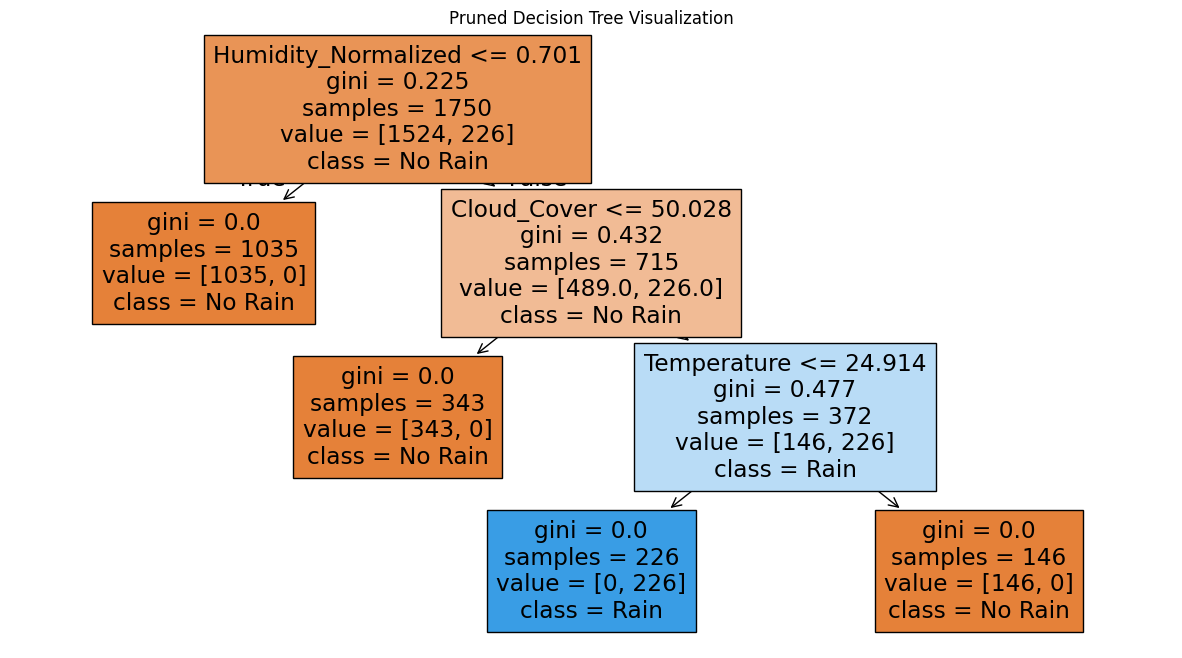

Unpruned Tree:
 |--- Humidity_Normalized <= 0.70
|   |--- class: 0
|--- Humidity_Normalized >  0.70
|   |--- Cloud_Cover <= 50.03
|   |   |--- class: 0
|   |--- Cloud_Cover >  50.03
|   |   |--- Temperature <= 24.91
|   |   |   |--- class: 1
|   |   |--- Temperature >  24.91
|   |   |   |--- class: 0


Pruned Tree:
 |--- Humidity_Normalized <= 0.70
|   |--- class: 0
|--- Humidity_Normalized >  0.70
|   |--- Cloud_Cover <= 50.03
|   |   |--- class: 0
|   |--- Cloud_Cover >  50.03
|   |   |--- Temperature <= 24.91
|   |   |   |--- class: 1
|   |   |--- Temperature >  24.91
|   |   |   |--- class: 0



In [61]:
plt.figure(figsize=(15, 8))
plot_tree(pruned_tree_clf, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()

print("Unpruned Tree:\n", export_text(tree_clf, feature_names=list(X.columns)))
print("\nPruned Tree:\n", export_text(pruned_tree_clf, feature_names=list(X.columns)))